In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
ls

README.md            RentTheRunway.ipynb


In [3]:
data = pd.read_json('../renttherunway_final_data.json', lines = True)

In [4]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [5]:
data.user_id.nunique()

105571

In [6]:
data.item_id.nunique()

5850

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [8]:
data['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

In [9]:
data['age'].describe()

count    191584.000000
mean         33.871017
std           8.058083
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

In [10]:
data['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

In [11]:
data['review_date'] = pd.to_datetime(data['review_date'])

In [12]:
data['review_date'].describe()

<ipython-input-12-27e35f41f86f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['review_date'].describe()


count                  192544
unique                   2274
top       2016-06-15 00:00:00
freq                      844
first     2010-11-03 00:00:00
last      2018-01-08 00:00:00
Name: review_date, dtype: object

In [13]:
#review date range 2010-11-03 - 2018-01-08
data['review_date'].sort_values()

179582   2010-11-03
95281    2011-02-14
42851    2011-02-23
47750    2011-02-24
171955   2011-03-06
            ...    
182302   2018-01-06
38691    2018-01-07
69945    2018-01-07
19016    2018-01-07
40148    2018-01-08
Name: review_date, Length: 192544, dtype: datetime64[ns]

In [14]:
data['rating'].describe()

count    192462.000000
mean          9.092371
std           1.430044
min           2.000000
25%           8.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [15]:
data['rating'].value_counts()

10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
Name: rating, dtype: int64

In [16]:
# divide by 2 so rating is on scale of 1-5 instead of 2-10
data['rating'] = data['rating'] / 2

<BarContainer object of 5 artists>

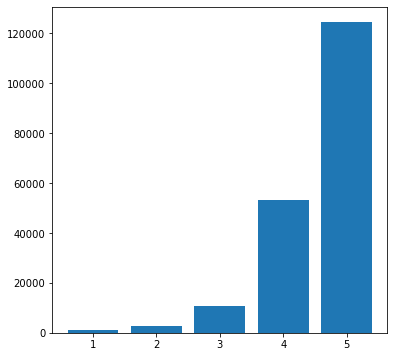

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(data['rating'])
x = data['rating'].value_counts().index
y = data['rating'].value_counts().values

ax.bar(x, y)

Text(0, 0.5, 'Count')

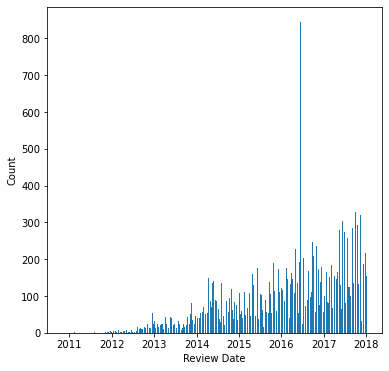

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
x = data['review_date'].value_counts().index
y = data['review_date'].value_counts().values

ax.bar(x, y, width = 0.7)
ax.set_xlabel('Review Date')
ax.set_ylabel('Count')

In [19]:
data['year_month'] = data['review_date'].dt.to_period('M').astype(str)

In [20]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,year_month
0,fit,420272,34d,2260466,137lbs,5.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,2016-04-20,2016-04
1,fit,273551,34b,153475,132lbs,5.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,2013-06-18,2013-06
2,fit,360448,NaN,1063761,NaN,5.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,2015-12-14,2015-12
3,fit,909926,34c,126335,135lbs,4.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,2014-02-12,2014-02
4,fit,151944,34b,616682,145lbs,5.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,2016-09-26,2016-09


In [21]:
data['year_month'].value_counts()

2017-10    8461
2017-11    6784
2017-05    6624
2017-06    6441
2017-09    6302
           ... 
2011-06       3
2011-04       2
2011-05       2
2011-07       1
2010-11       1
Name: year_month, Length: 85, dtype: int64

Text(0.5, 1.0, 'Review Date Distribution')

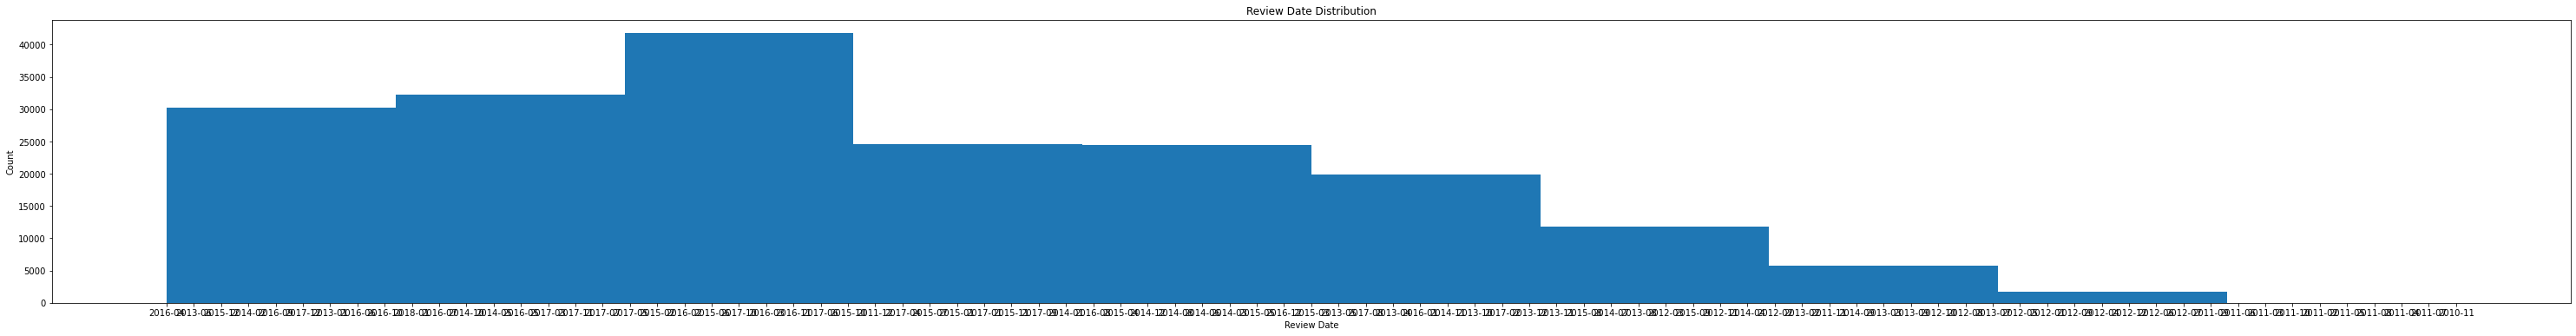

In [22]:
fig, ax = plt.subplots(figsize=(52,6))
x = data['year_month'].value_counts().index
y = data['year_month'].value_counts()

ax.hist(data['year_month'])
# ax.bar(x, y, width = 0.7)
ax.set_xlabel('Review Date')
ax.set_ylabel('Count')
ax.set_title('Review Date Distribution')

In [23]:
data['year'] = data['review_date'].dt.to_period('Y').astype(str).astype(int)

In [24]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,year_month,year
0,fit,420272,34d,2260466,137lbs,5.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,2016-04-20,2016-04,2016
1,fit,273551,34b,153475,132lbs,5.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,2013-06-18,2013-06,2013
2,fit,360448,NaN,1063761,NaN,5.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,2015-12-14,2015-12,2015
3,fit,909926,34c,126335,135lbs,4.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,2014-02-12,2014-02,2014
4,fit,151944,34b,616682,145lbs,5.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,2016-09-26,2016-09,2016


Text(0.5, 1.0, 'Review Date Distribution')

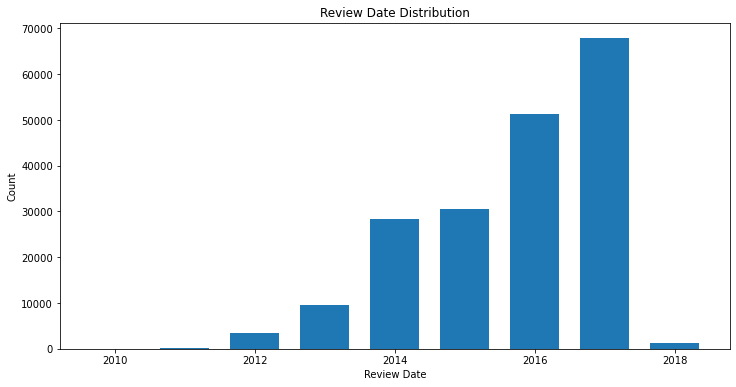

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
x = data['year'].value_counts().index
y = data['year'].value_counts()

# ax.hist(data['year'])
ax.bar(x, y, width = 0.7)
ax.set_xlabel('Review Date')
ax.set_ylabel('Count')
ax.set_title('Review Date Distribution')

In [26]:
# dummify fit, rented for, body type, category
# split bust size into bust size and cup size
# transform weight and height to numeric

In [27]:
data = pd.get_dummies(data, columns = ['fit', 'rented for', 'body type', 'category'], dummy_na = True)

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
data['bust_size'] = data['bust size'].str[:2]
data['cup_size'] = data['bust size'].str[2:]

# data['bust_size'] = data['bust size'].transform(lambda x: x[:2] if str(x) != 'nan' else x)
# data['cup_size'] = data['bust size'].transform(lambda x: x[2:] if str(x) != 'nan' else x)

In [30]:
data['bust_size'] = data['bust_size'].fillna('0').astype(int)

In [31]:
# dummify cup_size
data = pd.get_dummies(data, columns = ['cup_size'], dummy_na = True)

In [32]:
# transform weight and height to numeric
data['weight'] = data['weight'].str[:-3].fillna(0).astype(int)

# data['weight'] = data['weight'].transform(lambda x: str(x).replace('lbs', '') if str(x) != 'nan' else x).fillna(0).astype(int)


In [33]:
data['height_ft'] = data['height'].str[0].fillna(0).astype(int)
data['height_in'] = data['height'].str[0].fillna(0).astype(int) * 12 + data['height'].str[-3:-1].str.strip().fillna(0).astype(int)
data.height_in.unique()

array([68, 66, 64, 65, 69, 63, 62, 67, 61, 70, 72, 58, 73, 71, 60,  0, 59,
       56, 74, 75, 57, 54, 76, 55, 78])

In [34]:
data.head()

,user_id,bust size,item_id,weight,rating,review_text,review_summary,height,size,age,review_date,year_month,year,fit_fit,fit_large,fit_small,fit_nan,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_party: cocktail,rented for_vacation,rented for_wedding,rented for_work,rented for_nan,body type_apple,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow,body type_nan,category_ballgown,category_blazer,category_blouse,category_blouson,category_bomber,category_buttondown,category_caftan,category_cami,category_cape,category_cardigan,category_coat,category_combo,category_crewneck,category_culotte,category_culottes,category_down,category_dress,category_duster,category_for,category_frock,category_gown,category_henley,category_hoodie,category_jacket,category_jeans,category_jogger,category_jumpsuit,category_kaftan,category_kimono,category_knit,category_legging,category_leggings,category_maxi,category_midi,category_mini,category_overalls,category_overcoat,category_pant,category_pants,category_parka,category_peacoat,category_poncho,category_print,category_pullover,category_romper,category_sheath,category_shift,category_shirt,category_shirtdress,category_skirt,category_skirts,category_skort,category_suit,category_sweater,category_sweatershirt,category_sweatpants,category_sweatshirt,category_t-shirt,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest,category_nan,bust_size,cup_size_a,cup_size_aa,cup_size_b,cup_size_c,cup_size_d,cup_size_d+,cup_size_dd,cup_size_ddd/e,cup_size_f,cup_size_g,cup_size_h,cup_size_i,cup_size_j,cup_size_nan,height_ft,height_in
0,420272,34d,2260466,137,5.0,An adorable romper! Belt and zipper were a lit...,So many compliments!,"5' 8""",14,28.0,2016-04-20,2016-04,2016,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,68
1,273551,34b,153475,132,5.0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,"5' 6""",12,36.0,2013-06-18,2013-06,2013,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,66
2,360448,NaN,1063761,0,5.0,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,"5' 4""",4,116.0,2015-12-14,2015-12,2015,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,64
3,909926,34c,126335,135,4.0,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,"5' 5""",8,34.0,2014-02-12,2014-02,2014,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,65
4,151944,34b,616682,145,5.0,I have always been petite in my upper body and...,Was in love with this dress !!!,"5' 9""",12,27.0,2016-09-26,2016-09,2016,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,69


In [35]:
data = data.dropna(subset = ['rating'])
data['age'] = data['age'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192462 entries, 0 to 192543
Columns: 121 entries, user_id to height_in
dtypes: datetime64[ns](1), float64(2), int64(8), object(5), uint8(105)
memory usage: 44.2+ MB


In [36]:
X = data.drop(columns = ['rating'])
y = data['rating']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [38]:
# baseline model = always predicts mean rating
mean_rating = np.mean(y_train)
y_pred = np.full(y_test.shape, mean_rating)

mse = mean_squared_error(y_test, y_pred)

In [39]:
rmse = np.sqrt(mse)
rmse

0.7146114160372574

In [40]:
# Linear Regression 
# Featur selection: fit: fit, large, weight, height_in, age
X_train_lr = X_train[['fit_fit', 'fit_large', 'weight', 'height_in', 'age']]
X_test_lr = X_test[['fit_fit', 'fit_large', 'weight', 'height_in', 'age']]

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
y_pred = lr_model.predict(X_test_lr)

mse = mean_squared_error(y_test, y_pred)
mse

0.4777066514405057

In [42]:
rmse = np.sqrt(mse)
rmse

0.6911632596141853

The rmse for our first linear regression model is better than our baseline model by aproximately 0.02.

In [43]:
data1 = pd.read_json('../renttherunway_final_data.json', lines = True)

data1.info()
data1.category.value_counts()
data1["rented for"].value_counts()
data1[data1.rating < 6][["rented for", "rating"]].sort_values(by = "rating", ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


,rented for,rating
95951,other,2.0
146048,vacation,2.0
146252,other,2.0
62353,party,2.0
62236,everyday,2.0
...,...,...
73787,formal affair,4.0
73959,wedding,4.0
74052,wedding,4.0
73367,party,4.0


In [44]:
rating = []
rented_for = []
perc = []
df1 = pd.DataFrame(columns = ["rented for", "rating", "perc"]) 

rented_for_group = data1.groupby(["rented for", "rating"])
for name, group_data in rented_for_group:
    percentage = len(group_data)/len(data1[data1["rented for"] == name[0]])
    
    new_row = {'rented for':name[0], 'rating':name[1], 'perc':percentage}
    df1 = df1.append(new_row, ignore_index = True)
    
#     rating.append(name[0])
#     rented_for.append(name[1])
#     perc.append(percentage)
                                                   
df1.sort_values(by = ["rating", "perc"], ascending = [True, False])
# rented_for_per = pd.DataFrame({"rating": rating, "ranted_for": rented_for, "perc": perc})

,rented for,rating,perc
5,everyday,2.0,0.007312
20,party,2.0,0.006456
0,date,2.0,0.006226
36,work,2.0,0.005917
26,vacation,2.0,0.005890
15,other,2.0,0.005784
10,formal affair,2.0,0.005420
31,wedding,2.0,0.003894
6,everyday,4.0,0.025443
37,work,4.0,0.022138


Based on analysis of the data, I have decided to use everyday, party, date, work, vacation categories as features for my linear regression model because it is the top 5 categories of lowest rating.

In [51]:
# Linear Regression - 2nd iteration
# Featur selection: fit: fit, large, weight, height_in, age, rented for: everyday, date, party, vacation, work
X_train_lr2 = X_train[['fit_fit', 'fit_large', 'weight', 'height_in', 'age', 
                      'rented for_party', 'rented for_vacation', 'rented for_date', 'rented for_everyday', 'rented for_work']]
X_test_lr2 = X_test[['fit_fit', 'fit_large', 'weight', 'height_in', 'age',
                    'rented for_party', 'rented for_vacation', 'rented for_date', 'rented for_everyday', 'rented for_work']]

In [52]:
X_train_lr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144346 entries, 153576 to 128091
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fit_fit              144346 non-null  uint8  
 1   fit_large            144346 non-null  uint8  
 2   weight               144346 non-null  int64  
 3   height_in            144346 non-null  int64  
 4   age                  144346 non-null  float64
 5   rented for_party     144346 non-null  uint8  
 6   rented for_vacation  144346 non-null  uint8  
 7   rented for_date      144346 non-null  uint8  
 8   rented for_everyday  144346 non-null  uint8  
 9   rented for_work      144346 non-null  uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 5.4 MB


In [53]:
lr2_model = LinearRegression()
lr2_model.fit(X_train_lr2, y_train)
y_pred2 = lr2_model.predict(X_test_lr2)

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
rmse

0.6889256026655455

In [69]:
# Decision Tree
dt_model = DecisionTreeRegressor()

dt_grid = {'max_depth': [3, 5, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [10, 12, 15, 17, 20],
            'random_state': [1, None]
          }
dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                            dt_grid,
                            n_jobs = -1,
                            verbose = True,
                            scoring = 'neg_mean_squared_error')

In [70]:
dt_columns = ['weight', 'size', 'age',
         'fit_fit', 'fit_large', 'rented for_everyday',
       'rented for_formal affair', 'rented for_other', 'rented for_party',
       'rented for_party: cocktail', 'rented for_vacation',
       'rented for_wedding', 'rented for_work', 'rented for_nan',
       'body type_apple', 'body type_athletic', 'body type_full bust',
       'body type_hourglass', 'body type_pear', 'body type_petite',
       'body type_straight & narrow',
       'category_ballgown', 'category_blazer', 'category_blouse',
       'category_blouson', 'category_bomber', 'category_buttondown',
       'category_caftan', 'category_cami', 'category_cape',
       'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster',
       'category_for', 'category_frock', 'category_gown',
       'category_henley', 'category_hoodie', 'category_jacket',
       'category_jeans', 'category_jogger', 'category_jumpsuit',
       'category_kaftan', 'category_kimono', 'category_knit',
       'category_legging', 'category_leggings', 'category_maxi',
       'category_midi', 'category_mini', 'category_overalls',
       'category_overcoat', 'category_pant', 'category_pants',
       'category_parka', 'category_peacoat', 'category_poncho',
       'category_print', 'category_pullover', 'category_romper',
       'category_sheath', 'category_shift', 'category_shirt',
       'category_shirtdress', 'category_skirt', 'category_skirts',
       'category_skort', 'category_suit', 'category_sweater',
       'category_sweatershirt', 'category_sweatpants',
       'category_sweatshirt', 'category_t-shirt', 'category_tank',
       'category_tee', 'category_tight', 'category_top',
       'category_trench', 'category_trouser', 'category_trousers',
       'category_tunic', 'category_turtleneck','bust_size', 'cup_size_a', 'cup_size_aa',
       'cup_size_b', 'cup_size_c', 'cup_size_d', 'cup_size_d+',
       'cup_size_dd', 'cup_size_ddd/e', 'cup_size_f', 'cup_size_g',
       'cup_size_h', 'cup_size_i', 'cup_size_j', 'height_in']

In [71]:
dt_gridsearch.fit(X_train[dt_columns], y_train)
print("Best parameters: ", dt_gridsearch.best_params_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.8min finished


Best parameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 2, 'random_state': 1}


In [75]:
dt_model = dt_gridsearch.best_estimator_
y_pred = dt_model.predict(X_test[dt_columns])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6870529903680178

Our Decision Tree model performs the best out of the 3 models we have tried, as it has the lowest rmse

In [79]:
# Random Forset 
rf_grid = {'max_depth': [5, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [2, 4],
            'bootstrap': [True, False],
            'n_estimators': [80, 100, 120],
            'random_state': [1, None]
          }
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                            rf_grid,
                            n_jobs = -1,
                            verbose = True,
                            scoring = 'neg_mean_squared_error')

In [80]:
rf_gridsearch.fit(X_train[dt_columns], y_train)
print("Best parameters: ", rf_gridsearch.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 45.4min


KeyboardInterrupt: 

In [86]:
# rf_model = rf_gridsearch.best_estimator_
# y_pred = rf_model.predict(X_test[dt_columns])
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# rmse

rf_model = RandomForestRegressor(bootstrap= True, max_depth= None, min_samples_leaf= 20, min_samples_split= 4, random_state= 1)
rf_model.fit(X_train[dt_columns], y_train)
y_pred = rf_model.predict(X_test[dt_columns])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6823287780631114